In [84]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/boston.csv')
df.head()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [85]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [86]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [87]:
x=np.array(x)
y=np.array(y).reshape(-1,1)

In [88]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [90]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
#Fit only on training data
x_train=scalar.fit_transform(x_train)
#Transform test data using same parameters
x_test=scalar.transform(x_test)

In [91]:
from sklearn.linear_model import Ridge

In [108]:
from sklearn.linear_model import RidgeCV
#try multiple alpha values
alphas=np.logspace(-5,5,10)
ridge_cv=RidgeCV(alphas=alphas,cv=10)
ridge_cv.fit(x_train,y_train)
print("best alpha:",ridge_cv.alpha_)

best alpha: 3.593813663804626


In [93]:
best_ridge=Ridge(alpha=ridge_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_pred=best_ridge.predict(x_test)

In [110]:
from sklearn.metrics import mean_squared_error,r2_score
#MSE
mse=mean_squared_error(y_test,y_pred)
#rmse
rmse=np.sqrt(mse)
mse,rmse

(24.291119474973513, np.float64(4.928602182665336))

In [111]:
r2=r2_score(y_test,y_pred)
r2

0.668759493535632

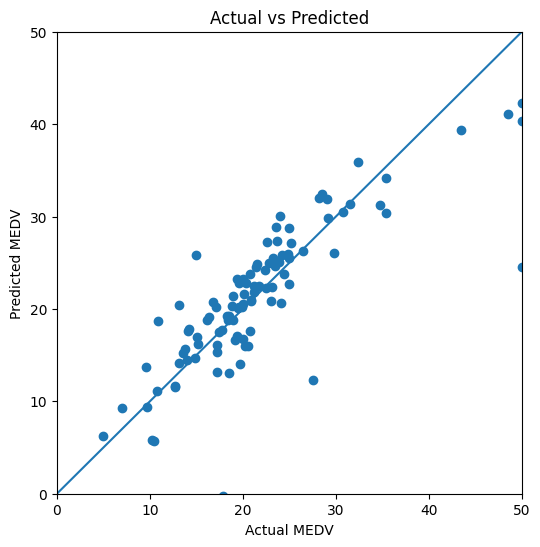

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
#plot prediction line
max_val=max(y_test.max(),y_pred.max())
plt.plot([0,max_val],[0,max_val], )
#start axes from 0
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted')
plt.show()

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
model=LinearRegression()

In [99]:
model.fit(x_train,y_train)

LinearRegression()

In [100]:
y_pred=model.predict(x_test)

In [101]:
print("Actual MEDV:",y_test)
print("Predicted MEDV:",y_pred[:5])

Actual MEDV: [[23.6]
 [32.4]
 [13.6]
 [22.8]
 [16.1]
 [20. ]
 [17.8]
 [14. ]
 [19.6]
 [16.8]
 [21.5]
 [18.9]
 [ 7. ]
 [21.2]
 [18.5]
 [29.8]
 [18.8]
 [10.2]
 [50. ]
 [14.1]
 [25.2]
 [29.1]
 [12.7]
 [22.4]
 [14.2]
 [13.8]
 [20.3]
 [14.9]
 [21.7]
 [18.3]
 [23.1]
 [23.8]
 [15. ]
 [20.8]
 [19.1]
 [19.4]
 [34.7]
 [19.5]
 [24.4]
 [23.4]
 [19.7]
 [28.2]
 [50. ]
 [17.4]
 [22.6]
 [15.1]
 [13.1]
 [24.2]
 [19.9]
 [24. ]
 [18.9]
 [35.4]
 [15.2]
 [26.5]
 [43.5]
 [21.2]
 [18.4]
 [28.5]
 [23.9]
 [18.5]
 [25. ]
 [35.4]
 [31.5]
 [20.2]
 [24.1]
 [20. ]
 [13.1]
 [24.8]
 [30.8]
 [12.7]
 [20. ]
 [23.7]
 [10.8]
 [20.6]
 [20.8]
 [ 5. ]
 [20.1]
 [48.5]
 [10.9]
 [ 7. ]
 [20.9]
 [17.2]
 [20.9]
 [ 9.7]
 [19.4]
 [29. ]
 [16.4]
 [25. ]
 [25. ]
 [17.1]
 [23.2]
 [10.4]
 [19.6]
 [17.2]
 [27.5]
 [23. ]
 [50. ]
 [17.9]
 [ 9.6]
 [17.2]
 [22.5]
 [21.4]]
Predicted MEDV: [[28.99672362]
 [36.02556534]
 [14.81694405]
 [25.03197915]
 [18.76987992]]


In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 24.291119474973513


In [104]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 4.928602182665336


In [105]:
from sklearn.metrics import r2_score

In [106]:
R2=r2_score(y_test,y_pred)
print("R^2 Value:",R2)

R^2 Value: 0.668759493535632


In [107]:
slope=model.coef_[0]
intercept=model.intercept_
print("Slope(m):",slope)
print("Intercept(c):",intercept)

Slope(m): [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Intercept(c): [22.79653465]
